<a href="https://colab.research.google.com/github/palVikram/Advance_tensorflow/blob/main/Time_series_analysis_using_deep_learning_sunspot_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf 

In [23]:
# Sunspots.csv
!gdown --id 1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5

Downloading...
From: https://drive.google.com/uc?id=1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5
To: /content/Sunspots.csv
100% 70.8k/70.8k [00:00<00:00, 48.7MB/s]


In [24]:
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

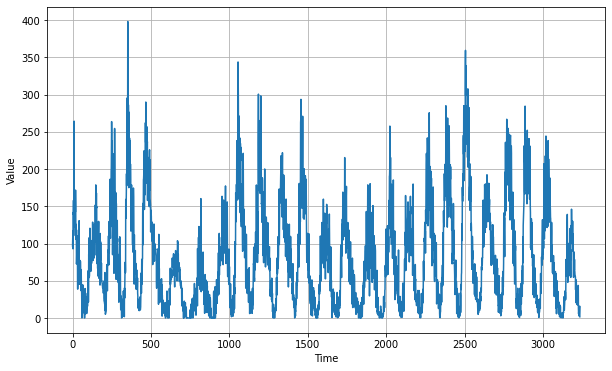

In [25]:
import csv
import numpy as np
time_step = []
sunspots = []

with open('./Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [26]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [27]:
time_train

array([   0,    1,    2, ..., 2997, 2998, 2999])

In [29]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series=tf.expand_dims(series, axis=-1)
  dataset=tf.data.Dataset.from_tensor_slices(series)
  dataset=dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset=dataset.map(lambda window: (window[:-1], window[-1:]))
  dataset=dataset.shuffle(buffer_size=shuffle_buffer)
  dataset=dataset.batch(batch_size).prefetch(1)

  return dataset

In [31]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(3000,)
Epoch 1/100
12/12 [==============================] - 6s 60ms/step - loss: 81.4328 - mae: 81.9305 - lr: 1.0000e-08
Epoch 2/100
12/12 [==============================] - 1s 56ms/step - loss: 80.2590 - mae: 80.7567 - lr: 1.1220e-08
Epoch 3/100
12/12 [==============================] - 1s 55ms/step - loss: 78.5311 - mae: 79.0287 - lr: 1.2589e-08
Epoch 4/100
12/12 [==============================] - 1s 56ms/step - loss: 76.5364 - mae: 77.0339 - lr: 1.4125e-08
Epoch 5/100
12/12 [==============================] - 1s 54ms/step - loss: 74.4509 - mae: 74.9484 - lr: 1.5849e-08
Epoch 6/100
12/12 [==============================] - 1s 56ms/step - loss: 72.3866 - mae: 72.8840 - lr: 1.7783e-08
Epoch 7/100
12/12 [==============================] - 1s 57ms/step - loss: 70.4372 - mae: 70.9347 - lr: 1.9953e-08
Epoch 8/100
12/12 [===============

(1e-08, 0.0001, 0.0, 60.0)

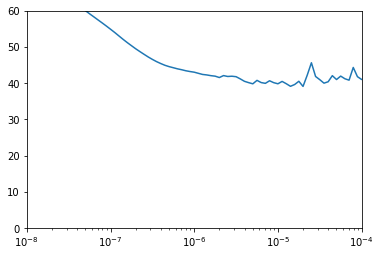

In [32]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [33]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
30/30 [==============================] - 5s 39ms/step - loss: 51.2724 - mae: 51.7703
Epoch 2/500
30/30 [==============================] - 1s 36ms/step - loss: 41.6318 - mae: 42.1290
Epoch 3/500
30/30 [==============================] - 1s 36ms/step - loss: 40.7389 - mae: 41.2362
Epoch 4/500
30/30 [==============================] - 1s 37ms/step - loss: 40.4468 - mae: 40.9439
Epoch 5/500
30/30 [==============================] - 1s 38ms/step - loss: 39.9474 - mae: 40.4446
Epoch 6/500
30/30 [==============================] - 1s 37ms/step - loss: 40.4369 - mae: 40.9341
Epoch 7/500
30/30 [==============================] - 1s 37ms/step - loss: 40.3548 - mae: 40.8520
Epoch 8/500
30/30 [==============================] - 1s 36ms/step - loss: 39.5316 - mae: 40.0289
Epoch 9/500
30/30 [==============================] - 1s 37ms/step - loss: 38.5865 - mae: 39.0836
Epoch 10/500
30/30 [==============================] - 1s 37ms/step - loss: 38.3532 - mae: 38.8502
Epoch 11/500
30/30 [=========

In [34]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

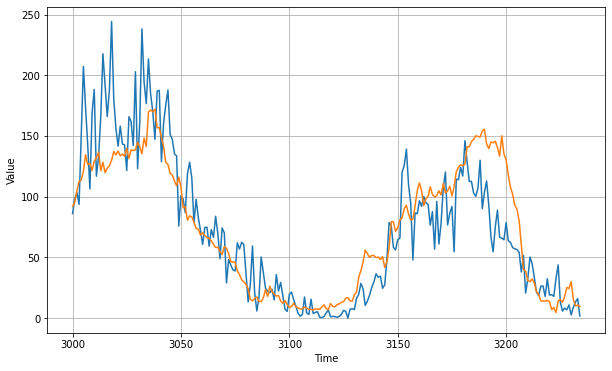

In [35]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [36]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

21.85024

<Figure size 432x288 with 0 Axes>

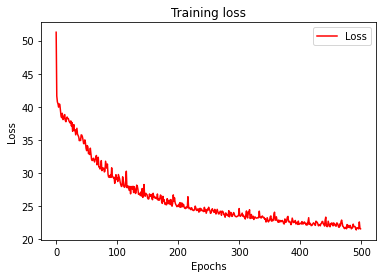

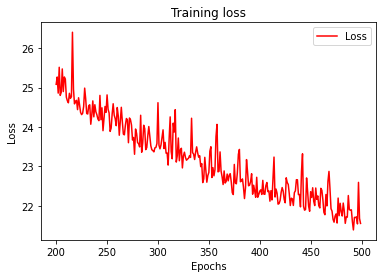

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()